In [354]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])


In [355]:
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris , load_boston, load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

In [297]:
def iris_info():
    print(f'iris_df.shape : {iris_df.shape}')
    print(f'iris_df.keys : {iris_df.keys()}')
    
    
iris = load_iris()
print(f'iris.keys : {iris.keys()}')
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_info()
iris_df['Target'] = iris.target
iris_info()


iris.keys : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
iris_df.shape : (150, 4)
iris_df.keys : Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
iris_df.shape : (150, 5)
iris_df.keys : Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target'],
      dtype='object')


In [298]:
X , y = load_iris(return_X_y=True)
# datasets 모듈의 데이터를 로드할 때, return_X_y=True를 파라미터로 넘겨주면
# 리턴 값으로 행렬 X와 벡터y가 리턴됩니다.
# 그럼 바로 train_test_split(X, y)를 할 수 있으니 중간 과정을 건너뛸 수 있어 한결 편해집니다
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)

In [299]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test) # 주의! fit한 결과에 대해서 test는 transform만 해주는걸로

In [300]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [301]:
print(f'학습 데이터 점수 : {model.score(X_train , y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test , y_test)}')

학습 데이터 점수 : 0.9666666666666667
평가 데이터 점수 : 0.9666666666666667


In [302]:
model = KNeighborsClassifier()
model.fit(X_train_scale , y_train)
print(f'학습 데이터 점수 : {model.score(X_train_scale , y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test_scale , y_test)}')

학습 데이터 점수 : 0.9666666666666667
평가 데이터 점수 : 0.9666666666666667


In [303]:
cross_validate(estimator=KNeighborsClassifier(),
    X=X, 
    y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(), 
    verbose=True,return_train_score=True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    4.9s finished


{'fit_time': array([0.00196147, 0.00195265, 0.00196147, 0.00196147, 0.0029285 ]),
 'score_time': array([0.0029242 , 0.00195312, 0.0029242 , 0.0029242 , 0.00196123]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.975     , 0.975     , 0.96666667])}

In [304]:
param_grid= [{'n_neighbors': [3,5,7],
                'weights':['uniform','distance'],
                'algorithm':['ball_tree','kd_tree','brute']}]
                

In [305]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True)

In [306]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=12,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [307]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [308]:
print(f'GridSearchCV best score : {gs.best_score_}')

GridSearchCV best score : 0.9800000000000001


In [356]:
# Graph function formula
def make_meshgrid(x, y, h = 0.02):
    x_min , x_max = x.min()-1 , x.max()+1
    y_min , y_max = y.min()-1 , y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h) , np.arange(y_min, y_max, h) )
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx,yy,Z,**params)
    return out


In [310]:
# TSNE >> 차원 축소
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [311]:
iris_comp_df = pd.DataFrame(data = X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,13.381392,-23.209309,0
1,13.022447,-20.756149,0
2,14.110551,-20.642675,0
3,13.917399,-20.340279,0
4,13.836433,-23.337698,0
...,...,...,...
145,-5.561827,2.996648,2
146,-5.740833,6.382402,2
147,-5.725132,4.163538,2
148,-6.115932,3.323838,2


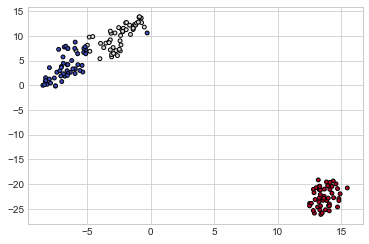

In [312]:
plt.scatter(X_comp[:,0],X_comp[:,1], c=y, cmap = plt.cm.coolwarm_r, s = 15 , edgecolors='k');

In [313]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

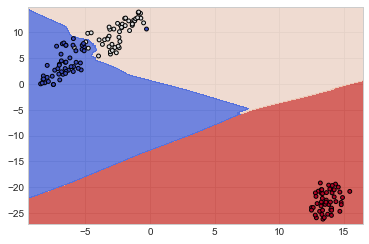

In [314]:

xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm_r, alpha= 0.8)
plt.scatter(X_comp[:,0] , X_comp[:,1], c=y, cmap = plt.cm.coolwarm_r, s = 15 , edgecolors='k');

In [ ]:
# =====================================================================================================
# =====================================================================================================

In [315]:
# cancer

cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data = cancer.data , columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [316]:
X , y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

cancer_train_df = pd.DataFrame(data = X_train , columns = cancer.feature_names)
cancer_train_df['target'] = y_train
print(f'cancer_df.shape : {cancer_df.shape}')
print(f'cancer_train_df.shape : {cancer_train_df.shape}')
cancer_test_df = pd.DataFrame(data = X_test , columns=cancer.feature_names)
cancer_test_df['target'] = y_test
print(f'cancer_test_df.shape : {cancer_test_df.shape}')


cancer_df.shape : (569, 31)
cancer_train_df.shape : (455, 31)
cancer_test_df.shape : (114, 31)


In [317]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

model = KNeighborsClassifier()
model.fit(X_train,y_train)
print(f'학습 데이터 점수 : {model.score(X_train , y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test , y_test)}')
model.fit(X_train_scaler,y_train)
print(f'학습 데이터 점수 : {model.score(X_train_scaler , y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test_scaler , y_test)}')


학습 데이터 점수 : 0.9472527472527472
평가 데이터 점수 : 0.8859649122807017
학습 데이터 점수 : 0.9758241758241758
평가 데이터 점수 : 0.956140350877193


In [318]:
estimator = make_pipeline(
    StandardScaler(),KNeighborsClassifier()
)
cross_validate(estimator = estimator,
    X = X, 
    y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(), 
    verbose=True, return_train_score=True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00195527, 0.00195241, 0.00195241, 0.0019536 , 0.00195265]),
 'score_time': array([0.00586271, 0.0048852 , 0.0048852 , 0.00586343, 0.00586462]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177]),
 'train_score': array([0.97582418, 0.97362637, 0.97142857, 0.97362637, 0.97587719])}

In [319]:
pipe = Pipeline(
    [('scaler',StandardScaler()),
    ('model',model)]   
)

In [320]:
param_grid= [{'model__n_neighbors': [3,5,7],
                'model__weights':['uniform','distance'],
                'model__algorithm':['ball_tree','kd_tree','brute']}]
                

In [321]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=12,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [322]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [323]:
print(f'GridSearchCV best score : {gs.best_score_}')
print('GridSearchCV best score : %.3f' % gs.best_score_)

GridSearchCV best score : 0.9701288619779538
GridSearchCV best score : 0.970


In [324]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)
X_comp.shape

(569, 2)

In [325]:
cancer_comp_df = pd.DataFrame(data = X_comp)
cancer_comp_df['target'] = y
cancer_comp_df

,0,1,target
0,26.911989,-21.199432,0
1,27.702169,-23.726065,0
2,23.037533,-25.086023,0
3,2.729464,24.615067,0
4,22.355879,-27.338486,0
...,...,...,...
564,29.394695,-23.643213,0
565,24.112640,-25.415672,0
566,5.190335,-27.172400,0
567,25.488615,-24.252592,0


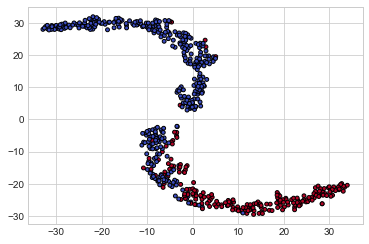

In [326]:
# plot_contours(model, xx, yy, cmap=plt.cm.coolwarm_r, alpha= 0.8)
plt.scatter(X_comp[:,0] , X_comp[:,1], c=y, cmap = plt.cm.coolwarm_r, s = 15 , edgecolors='k');

In [327]:
model = KNeighborsClassifier()
model.fit(X_comp,y)
predict = model.predict(X_comp)


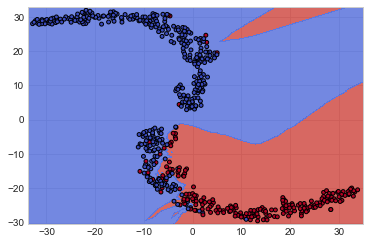

In [329]:
xx,yy = make_meshgrid(X_comp[:,0],X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm_r,alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm_r, s=15, edgecolors='k');

In [337]:
### boston regression
boston = load_boston()
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [342]:
X,y = boston.data, boston.target
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.2)

boston_train_df = pd.DataFrame(data = X_train, columns=boston.feature_names )
boston_train_df['TARGET'] = y_train
boston_test_df = pd.DataFrame(data = X_test, columns=boston.feature_names )
boston_test_df['TARGET'] = y_test
print(f'boston_train_df.shape : {boston_train_df.shape}')
print(f'boston_test_df.shape : {boston_test_df.shape}')

boston_train_df.shape : (404, 14)
boston_test_df.shape : (102, 14)


In [352]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
print(f'X_train_scale.shape : {X_train_scale.shape}')
print(f'X_test_scale.shape : {X_test_scale.shape}')
print('*'*100)
print(f'X_train_scale \n {X_train_scale}')
print('*'*100)
print(f'X_test_scale \n {X_test_scale}')


X_train_scale.shape : (404, 13)
X_test_scale.shape : (102, 13)
****************************************************************************************************
X_train_scale 
 [[-0.25508937 -0.4879381  -0.46357081 ...  1.15852002 -1.07222805
   1.03328635]
 [-0.13798628 -0.4879381   1.19594123 ... -1.69733002 -0.22501462
  -0.22363709]
 [-0.4291422  -0.4879381  -0.20826126 ... -0.02008475  0.45551348
  -0.50790803]
 ...
 [-0.47725508  1.97223539 -1.09604218 ... -0.38273238  0.46805634
  -0.80053987]
 [-0.47505777  0.63032258 -0.93937496 ...  0.25190096  0.46805634
  -1.06390853]
 [-0.45685361 -0.4879381  -0.40264467 ...  1.11318907  0.45530616
   0.79918088]]
****************************************************************************************************
X_test_scale 
 [[-0.47148747 -0.4879381  -1.05687538 ... -0.83604191  0.40648228
  -1.05833459]
 [-0.47231042 -0.4879381   0.08621509 ...  1.15852002  0.46805634
  -1.01513656]
 [-0.36156556 -0.4879381  -0.46357081 ...  1.15852

In [360]:
model = KNeighborsRegressor()
model.fit(X_train , y_train)

KNeighborsRegressor()

In [361]:
print(f'학습 데이터 점수 : {model.score(X_train , y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test , y_test)}')

학습 데이터 점수 : 0.7315200143498976
평가 데이터 점수 : 0.41463901226545263


In [363]:
model = KNeighborsRegressor()
model.fit(X_train_scale , y_train)
print(f'학습 데이터 점수 : {model.score(X_train_scale , y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test_scale , y_test)}')

학습 데이터 점수 : 0.84658139559455
평가 데이터 점수 : 0.7678831495303352


In [364]:
estimator = make_pipeline(
    StandardScaler(),KNeighborsRegressor()
)
cross_validate(estimator = estimator,
    X = X, 
    y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(), 
    verbose=True, return_train_score=True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    1.9s finished


{'fit_time': array([0.00299907, 0.00351858, 0.00300145, 0.00200057, 0.00300574]),
 'score_time': array([0.00200057, 0.00099206, 0.00150919, 0.00100303, 0.00100517]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037]),
 'train_score': array([0.86746018, 0.86059982, 0.8274577 , 0.89412458, 0.84735288])}

In [365]:
pipe = Pipeline(
    [('scaler',StandardScaler()),
    ('model',model)]    # model = KNeighborsRegressor()
)

In [366]:
param_grid= [{'model__n_neighbors': [3,5,7],
                'model__weights':['uniform','distance'],
                'model__algorithm':['ball_tree','kd_tree','brute']}]
                

In [367]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=12,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [368]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [369]:
print(f'GridSearchCV best score : {gs.best_score_}')
print('GridSearchCV best score : %.3f' % gs.best_score_)

GridSearchCV best score : 0.4973060611762845
GridSearchCV best score : 0.497


In [374]:
tsne = TSNE(n_components=1) # 회귀 임으로 방식 1개로 축소
X_comp = tsne.fit_transform(X)
X_comp.shape

(506, 1)

In [375]:
boston_comp_df = pd.DataFrame(data = X_comp)
boston_comp_df['target'] = y
boston_comp_df

,0,target
0,-11.574654,24.0
1,15.913522,21.6
2,12.357205,34.7
3,13.197030,33.4
4,13.450297,36.2
...,...,...
501,-0.730983,22.4
502,-0.098018,20.6
503,0.671668,23.9
504,0.631834,22.0


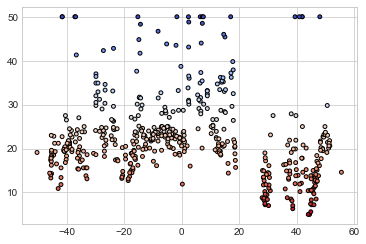

In [376]:
# plot_contours(model, xx, yy, cmap=plt.cm.coolwarm_r, alpha= 0.8)
plt.scatter(X_comp, y, c=y, cmap = plt.cm.coolwarm_r, s = 15 , edgecolors='k');

In [377]:
model = KNeighborsRegressor()
model.fit(X_comp,y)
predict = model.predict(X_comp)


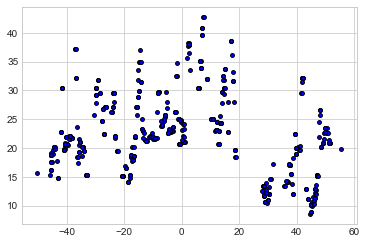

In [379]:
# xx,yy = make_meshgrid(X_comp[:,0],X_comp[:,1])
# plot_contours(model, xx, yy, cmap=plt.cm.coolwarm_r,alpha=0.8)
plt.scatter(X_comp, predict, c='b', cmap=plt.cm.coolwarm, s=15, edgecolors='k');